## Observations and Insights 

Observation One:
The first observation that can be gathered from the data is Ramicane had the lowest average for the tumor volume size. Capomulin had the second lowest average. The rest of the treatments have pretty similiar means. This shows us that Ramicane and Capomulin were the most succesfull for tumor volume size.

Observation Two:
Capomulin and Ramicane are two comparable drug treatments. Capomulin used 230 mice in the trial and Ramicane used 228. To figure out which treatment would be best for anti-cancer pharmaceuticals, it would be beneficial to compare these two treatments more in depth. 

Observation Three: 
The Capomulin method has a correlation between weight and tumor of 0.2763..., which means there's a correlation between the data, however it is close to 0, which means it's not that strong. 

In [823]:
%matplotlib inline

In [824]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data copy/Mouse_metadata.csv"
study_results_path = "data copy/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset (merge)
combined_mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [825]:
# Checking the number of mice in the DataFrame. 
combined_mouse_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [837]:
#check the amount of duplicates
dup = combined_mouse_data.duplicated(['Mouse ID','Timepoint'])
dup.sum()

5

In [831]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
dup_two_mice = combined_mouse_data[combined_mouse_data.duplicated(subset=["Timepoint", "Mouse ID"], keep="first")]
dup_two_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [834]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_data = combined_mouse_data[combined_mouse_data["Mouse ID"]!='g989']
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [835]:
# Checking the number of mice with datapoints in the clean DataFrame.

final_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [836]:
#Nunique the amount of Mouse ID and Timepoints
check_mice = final_data["Mouse ID"].nunique()
timpoints_data = final_data["Timepoint"].nunique()
check_mice
print(check_mice)
print(timepoints_data)

248
10


In [840]:
#final check on nunique data
final_data.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [841]:
#create groupby for drug regimen to determine the tumor vol for each regimen
drug_regimen_stats = final_data.groupby("Drug Regimen")
drug_regimen_stats.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [843]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean_mouse = final_data["Tumor Volume (mm3)"].mean()
mean_mouse

median_mouse = final_data["Tumor Volume (mm3)"].median()
median_mouse

var_mouse = np.var(final_data ["Tumor Volume (mm3)"], ddof=0)
var_mouse

stand_mouse = np.std(final_data ["Tumor Volume (mm3)"], ddof=0)
stand_mouse

sem_mouse = st.sem(final_data["Tumor Volume (mm3)"], ddof=0)
sem_mouse

summary_stats = {"Mean": mean_mouse_2,
                "Median": median_mouse_2,
                "Variance": var_mouse_2,
                "Standard Deviation": stand_mouse_2,
                "SEM": sem_mouse_2
}


summary_stats_table = pd.DataFrame(summary_stats, columns=["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
summary_stats_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [844]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#.AGGFUNCTION This method produces everything in a single groupby function.

final_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [845]:
#reset index and breakdown drug methods to plot the number of mice per timepoint
drug_breakdown = drug_regimen_stats.count()
drug_breakdown

reset = drug_breakdown.reset_index()
reset

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [846]:
#Pull out Drug Regimen and Timepoint info to create bar graph
pract = reset[["Drug Regimen", "Timepoint"]]
pract

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


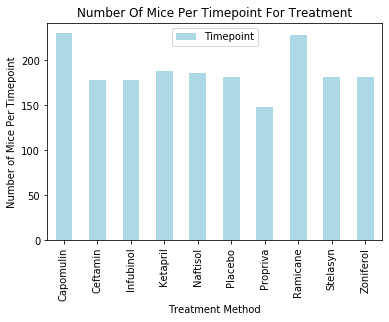

<Figure size 432x288 with 0 Axes>

In [867]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Number of mice per time point for each treatment regimen throughout the course of the study for each treatment
#are we doing a stacked bar graph? Will need to do two/three different things by the timepoint
x_axis = ("Drug Regimen")

mice_bar = pract.plot(x_axis, kind="bar", facecolor="lightblue")
plt.title("Number Of Mice Per Timepoint For Treatment")
plt.xlabel("Treatment Method")
plt.ylabel("Number of Mice Per Timepoint")
plt.show()
plt.tight_layout()

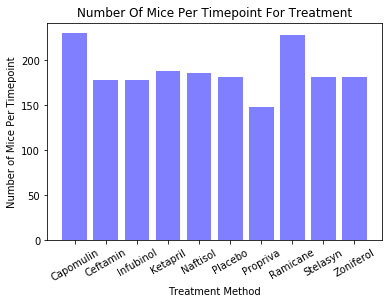

<Figure size 432x288 with 0 Axes>

In [848]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

timepoints_bar = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

x_axis = drugs
y_axis = np.arange(len(timepoints_bar))

plt.bar(x_axis,timepoints_bar, color='blue', alpha=0.5, align="center")
plt.title("Number Of Mice Per Timepoint For Treatment")
plt.xlabel("Treatment Method")
plt.ylabel("Number of Mice Per Timepoint")

plt.xticks(x_axis,[value for value in x_axis], rotation=30)

plt.show()
plt.tight_layout()


## Pie Plots

In [850]:
#breakdown the gender of the mice, use the total number of mice 
gender = final_data.groupby("Sex")
total_gender = gender.nunique()
total_gender

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,,
Female,123,10,1,24,14,10,800,5
Male,125,10,1,24,14,10,834,5


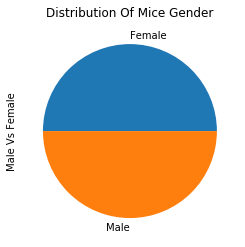

(-0.05, 1.05, -0.05, 1.05)

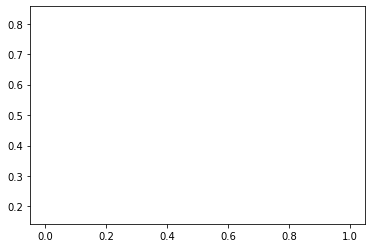

In [851]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_gender = total_gender["Timepoint"].plot(kind="pie", y=total_gender, title=("Distribution Of Mice Gender"))
pie_gender.set_ylabel("Male Vs Female")

total_gender.keys()

plt.show()
plt.tight_layout()
plt.axis("equal")



(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

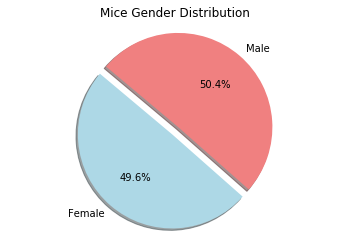

In [852]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [123, 125]
colors = ["lightblue", "lightcoral"]
explode = [0.1,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Mice Gender Distribution")
plt.axis("equal")




## Quartiles, Outliers and Boxplots

In [853]:
#Capumulin, create dataframes for each of them loc data to pull out weight, vol, drug, for quartiles to calc final tumor vol of each mouse
cap = final_data.loc[final_data["Drug Regimen"]=="Capomulin",["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
cap

,Drug Regimen,Weight (g),Tumor Volume (mm3)
10,Capomulin,17,45.000000
11,Capomulin,17,43.878496
12,Capomulin,17,37.614948
13,Capomulin,17,38.177232
14,Capomulin,17,36.866876
...,...,...,...
440,Capomulin,24,47.685963
1452,Capomulin,25,45.000000
1453,Capomulin,25,45.597064
1454,Capomulin,25,46.059608


In [854]:
#Ramicane, create dataframes for each of them loc data to pull out weight, vol, drug, for quartiles to calc final tumor vol of each mouse

ram = final_data.loc[final_data["Drug Regimen"]=="Ramicane",["Drug Regimen", "Tumor Volume (mm3)"]]
ram

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
449,Ramicane,43.166373
450,Ramicane,45.000000
451,Ramicane,45.877545
452,Ramicane,46.378092


In [855]:
#Infubinol, create dataframes for each of them loc data to pull out weight, vol, drug, for quartiles to calc final tumor vol of each mouse
inf = final_data.loc[final_data["Drug Regimen"]=="Infubinol",["Drug Regimen", "Tumor Volume (mm3)"]]
inf

,Drug Regimen,Tumor Volume (mm3)
454,Infubinol,45.000000
455,Infubinol,48.508468
456,Infubinol,51.852437
457,Infubinol,52.777870
458,Infubinol,55.173336
...,...,...
1868,Infubinol,54.316407
1869,Infubinol,56.286750
1870,Infubinol,58.628399
1871,Infubinol,60.053740


In [856]:
#Ceftamin, create dataframes for each of them loc data to pull out weight, vol, drug, for quartiles to calc final tumor vol of each mouse

cef = final_data.loc[final_data["Drug Regimen"]=="Ceftamin",["Drug Regimen", "Tumor Volume (mm3)"]]
cef

,Drug Regimen,Tumor Volume (mm3)
484,Ceftamin,45.000000
485,Ceftamin,46.795257
486,Ceftamin,47.371343
487,Ceftamin,49.734404
488,Ceftamin,50.513437
...,...,...
1851,Ceftamin,57.173538
1852,Ceftamin,59.033275
1853,Ceftamin,61.153140
1854,Ceftamin,63.469549


In [857]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin

quartiles = cap["Tumor Volume (mm3)"].quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of final tumor volume is {lowerq}")
print(f"The upper quartile of final tumor volume is {upperq}")
print(f"The interquartile range of the final tumor volume is {iqr}")
print(f"The median of final tumor volume is {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is 37.685932865
The upper quartile of final tumor volume is 45.0
The interquartile range of the final tumor volume is 7.314067135000002
The median of final tumor volume is 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [858]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane

quartiles = ram["Tumor Volume (mm3)"].quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of final tumor volume is {lowerq}")
print(f"The upper quartile of final tumor volume is {upperq}")
print(f"The interquartile range of the final tumor volume is {iqr}")
print(f"The median of final tumor volume is {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is 36.67463458499999
The upper quartile of final tumor volume is 45.0
The interquartile range of the final tumor volume is 8.325365415000007
The median of final tumor volume is 40.67323554
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [859]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Infubinol

quartiles = inf["Tumor Volume (mm3)"].quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of final tumor volume is {lowerq}")
print(f"The upper quartile of final tumor volume is {upperq}")
print(f"The interquartile range of the final tumor volume is {iqr}")
print(f"The median of final tumor volume is {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is 47.3123533
The upper quartile of final tumor volume is 57.314443967500004
The interquartile range of the final tumor volume is 10.002090667500006
The median of final tumor volume is 51.82058438
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [860]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ceftamin

quartiles = cef["Tumor Volume (mm3)"].quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of final tumor volume is {lowerq}")
print(f"The upper quartile of final tumor volume is {upperq}")
print(f"The interquartile range of the final tumor volume is {iqr}")
print(f"The median of final tumor volume is {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is 47.208427112500004
The upper quartile of final tumor volume is 56.801437570000004
The interquartile range of the final tumor volume is 9.5930104575
The median of final tumor volume is 51.77615728000001
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


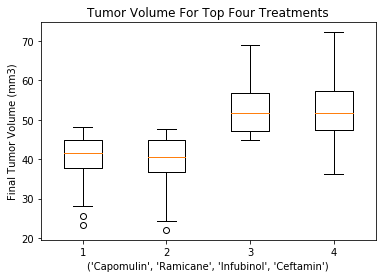

In [861]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ax1 = plt.boxplot([cap["Tumor Volume (mm3)"], ram["Tumor Volume (mm3)"], cef["Tumor Volume (mm3)"], inf["Tumor Volume (mm3)"]])
plt.title("Tumor Volume For Top Four Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel(("Capomulin", "Ramicane", "Infubinol", "Ceftamin"))
plt.show()

## Line and Scatter Plots

In [863]:
#Pull data for ONE mouse for line plot
cap_line = final_data.loc[final_data["Drug Regimen"]=="Capomulin",["Mouse ID","Drug Regimen", "Weight (g)", "Tumor Volume (mm3)", "Timepoint"]]

cap_line_l509 = cap_line.loc[cap_line["Mouse ID"]=="l509",["Drug Regimen", "Tumor Volume (mm3)", "Weight (g)", "Timepoint"]]
cap_line_l509


,Drug Regimen,Tumor Volume (mm3),Weight (g),Timepoint
371,Capomulin,45.000000,21,0
372,Capomulin,45.851193,21,5
373,Capomulin,46.759074,21,10
374,Capomulin,47.488599,21,15
375,Capomulin,48.070452,21,20
376,Capomulin,44.006257,21,25
377,Capomulin,44.708055,21,30
378,Capomulin,40.207289,21,35
379,Capomulin,40.770813,21,40
380,Capomulin,41.483008,21,45


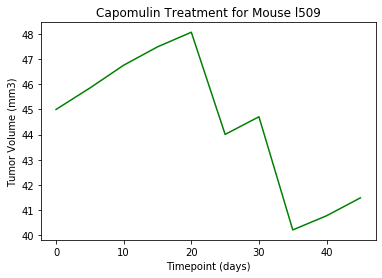

In [864]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis =  cap_line_l509["Timepoint"]

y_axis =  cap_line_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="green", label="Timepoint")

plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [668]:
# cap_2 = mouse_data_2.loc[mouse_data_2["Drug Regimen"]=="Capomulin",["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
# cap_2

# cap_line_l509_2 = cap_2.loc[cap_2["Mouse ID"]=="l509",["Drug Regimen", "Tumor Volume (mm3)"]]
# cap_line_l509_2

# mean_cap = cap_line_l509_2.mean()
# mean_cap

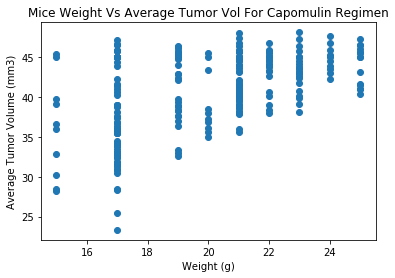

In [865]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#use the same info

x_values = cap["Weight (g)"]
y_values = cap["Tumor Volume (mm3)"] 

plt.scatter(x_values, y_values)
plt.title("Mice Weight Vs Average Tumor Vol For Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation is 0.2763600223455911


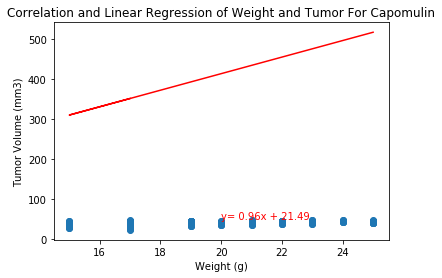

In [866]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#look at the pearsonr, function corr, just need the cap data which is the weight and the tumor volume
#use the regressed values y = mx+b, 


x_values_2 = cap["Weight (g)"] 
y_values_2 = cap["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2, y_values_2)
regress_values = x_values * slope * +intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_2, y_values_2)
plt.plot(x_values_2, regress_values, "r-")
plt.annotate(line_eq, (20,50), fontsize=10,color="red")
print(f"The correlation is {rvalue**2}")

plt.title("Correlation and Linear Regression of Weight and Tumor For Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

